# Finite Difference Methods Error Comparisson

In [9]:
import tables
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

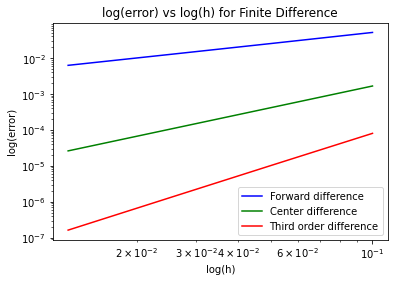

In [10]:
# forward difference

dp = np.zeros(4)
inputs = [0.1, 0.05, 0.025, 0.0125]
dp_difference = np.zeros(4)
# table to be read vertically
dp_error_order = np.zeros((4,4)) # row = error, column = power of h

# centered difference

d0 = np.zeros(4)
d0_difference = np.zeros(4)
# table to be read vertically
d0_error_order = np.zeros((4,4)) # row = error, column = power of h

# third order difference
d3 = np.zeros(4)
d3_difference = np.zeros(4)
# table to be read vertically
d3_error_order = np.zeros((4,4)) # row = error, column = power of h



for i in range(4):
    # compute approximation and error for forward difference
    dp[i] = (np.exp(inputs[i]) - 1)/inputs[i]
    dp_difference[i] = np.abs(dp[i] - 1)
    # compute approximation and error for center difference
    d0[i] = (np.exp(inputs[i]) - np.exp(-inputs[i]))/(2*inputs[i])
    d0_difference[i] = np.abs(d0[i] - 1)
    # compute approximation and error for third order difference
    d3[i] = (2*np.exp(inputs[i]) + 3 - 6*np.exp(-inputs[i]) + np.exp(-2*inputs[i]))/(6*inputs[i])
    d3_difference[i] = np.abs(d3[i]-1)
    
# compute error table
for i in range(4):
    for j in range(4):
        # forward difference
        dp_error_order[i,j] = dp_difference[i]/(inputs[i]**j)
        # center difference
        d0_error_order[i,j] = d0_difference[i]/(inputs[i]**j)
        # third order difference
        d3_error_order[i,j] = d3_difference[i]/(inputs[i]**j)
        
# create tables
dp_table = pd.DataFrame(dp_error_order, index = ["0.1", "0.05", "0.025", "0.0125"] ,
                        columns = ["error", "error/h", "error/h^2", "error/h^3"])
dp_table.to_csv("p1_forward_diff_table.csv")
d0_table = pd.DataFrame(d0_error_order, index = ["0.1", "0.05", "0.025", "0.0125"] ,
                        columns = ["error", "error/h", "error/h^2", "error/h^3"])
d0_table.to_csv("p1_center_diff_table.csv")
d3_table =  pd.DataFrame(d3_error_order, index = ["0.1", "0.05", "0.025", "0.0125"] ,
                        columns = ["error", "error/h", "error/h^2", "error/h^3"])
d3_table.to_csv("p1_third_diff_table.csv")
        

# plots
plt.plot(inputs, dp_difference, color = "blue", label = "Forward difference")
plt.plot(inputs, d0_difference, color = "green", label = "Center difference")
plt.plot(inputs, d3_difference, color = "red", label = "Third order difference")
plt.legend()
plt.title("log(error) vs log(h) for Finite Difference")
plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.yscale("log")
plt.xscale("log")
plt.savefig("p1_plots.png")

In [11]:
# Richardson extrapolation

# forward difference
rich_dp = 2*dp[3] - dp[2]
rich_dp_error = np.abs(rich_dp - 1)

# center difference
rich_d0 = (4*d0[3] -d0[2])/3
rich_d0_error = np.abs(rich_d0 - 1)

print("Richardson extrapolation for forward difference:" , rich_dp, "\nError:" , rich_dp_error)
print("\nRichardson extrapolation for centered difference:" , rich_d0, "\nError:" , rich_d0_error)

Richardson extrapolation for forward difference: 0.9999474255243523 
Error: 5.2574475647659824e-05

Richardson extrapolation for centered difference: 0.9999999991861838 
Error: 8.138162366222446e-10


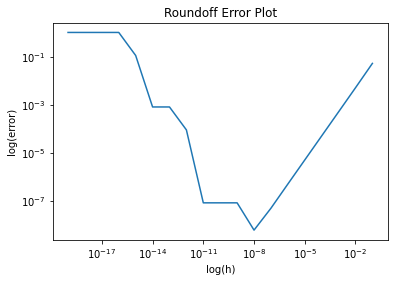

In [14]:
# Roundoff errors

# forward difference function
def _dp(h):
    return (np.exp(h)-1)/h

points = 20
# values of h
inputs = [10**(-i) for i in range(1,points)]
# forward difference array
dp_array = np.zeros(points-1)
# error array
errors = np.zeros(points-1)

# compute forward difference approximations
for i in range(points-1):
    dp_array[i] = _dp(inputs[i])
    errors[i] = np.abs(dp_array[i] - 1)

# plot
plt.plot(inputs, errors)
plt.title("Roundoff Error Plot")
plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.xscale("log")
plt.yscale("log")
plt.savefig("p2_plot.png")
plt.show()

In [16]:
# finite difference computation function
def finite_diff(h1,h2):
    return 2*np.exp(-h1)/(h1*(h1+h2)) - 2/(h1*h2) + 2*np.exp(h2)/(h2*(h1+h2))

d_array = np.zeros(3)

d_array[0] = finite_diff(0.05,0.1)
d_array[1] = finite_diff(0.005,0.01)
d_array[2] = finite_diff(0.0005, 0.001)

d_error_array = d_array - np.ones(3)

print("h1 = 0.05 and h2 = 0.1:", d_array[0], "\nError:", d_error_array[0])
print("\nh1 = 0.005 and h2 = 0.01:", d_array[1], "\nError:", d_error_array[1])
print("\nh1 = 0.0005 and h2 = 0.001:", d_array[2], "\nError:", d_error_array[2])

[1.01730228 1.00167293 1.00016673]
[0.01730228 0.00167293 0.00016673]
h1 = 0.05 and h2 = 0.1: 1.0173022769434112 
Error: 0.017302276943411243

h1 = 0.005 and h2 = 0.01: 1.0016729271046643 
Error: 0.001672927104664268

h1 = 0.0005 and h2 = 0.001: 1.0001667293254286 
Error: 0.00016672932542860508


In [19]:
# centered difference
centered_array = np.zeros(3)
for i in range(3):
    centered_array[i] = finite_diff(10**(-(i+1)),10**(-(i+1)))
    
cent_error_array = centered_array - np.ones(3)

print("h = 0.1:", centered_array[0], "\nError:", cent_error_array[0])
print("\nh = 0.01:", centered_array[1], "\nError:", cent_error_array[1])
print("\nh = 0.001:", centered_array[2], "\nError:", cent_error_array[2])


h = 0.1: 1.000833611160715 
Error: 0.0008336111607150087

h = 0.01: 1.0000083333598013 
Error: 8.333359801326878e-06

h = 0.001: 1.000000083586201 
Error: 8.35862010717392e-08
